# Read the data

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import datetime
from datetime import date


In [2]:
# Read the dat
df= pd.read_csv("UK Road Accidents 2018.csv")

Random sample of data set, shows more variation in the data set than df.head(). Data set is usually sorted.

In [3]:
df.sample(5)

,datetime,Count,Day_of_Week,Precipitation,High_Winds,Road_Surface_Conditions,Light_Conditions,Urban_or_Rural_Area
1667,14/03/2018 01:00,1,Wednesday,Fine,False,Dry,Darkness - lights lit,Urban
1984,27/03/2018 14:00,15,Tuesday,Fine,False,Dry,Daylight,Urban
6665,13/10/2018 06:00,4,Saturday,Fine,False,Wet or damp,Darkness - lights lit,Rural
7327,10/11/2018 08:00,13,Saturday,Fine,False,Wet or damp,Daylight,Urban
7567,20/11/2018 14:00,19,Tuesday,Raining,False,Wet or damp,Daylight,Urban


Non-null count provides the same as " RangeIndex - df.isna().sum()"

RangeIndex: 8540 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   datetime                 8540 non-null   object
 1   Count                    8540 non-null   int64 
 2   Day_of_Week              8540 non-null   object
 3   Precipitation            8540 non-null   object
 4   High_Winds               8540 non-null   bool  
 5   Road_Surface_Conditions  8540 non-null   object
 6   Light_Conditions         8540 non-null   object
 7   Urban_or_Rural_Area      8540 non-null   object
dtypes: bool(1), int64(1), object(6)
memory usage: 475.5+ KB


df.isna().sum()

## Dr Strange 

In [7]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['datetime'] = pd.to_datetime(df['datetime'], format="%d/%m/%Y %H:%M" , errors='coerce')
    df['hour'] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['quarter'] = df['datetime'].dt.quarter
    df['month'] = df['datetime'].dt.month
    #df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['datetime'].dt.dayofyear
    df['dayofmonth'] = df['datetime'].dt.day
    df['weekofyear'] = df['datetime'].dt.weekofyear
    
    
    X = df[['hour','dayofweek','quarter','month',
            #'year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [8]:
create_features(df).shape

(8540, 7)

In [9]:
df.columns

Index(['datetime', 'Count', 'Day_of_Week', 'Precipitation', 'High_Winds',
       'Road_Surface_Conditions', 'Light_Conditions', 'Urban_or_Rural_Area',
       'hour', 'dayofweek', 'quarter', 'month', 'dayofyear', 'dayofmonth',
       'weekofyear'],
      dtype='object')

Day_of_Week


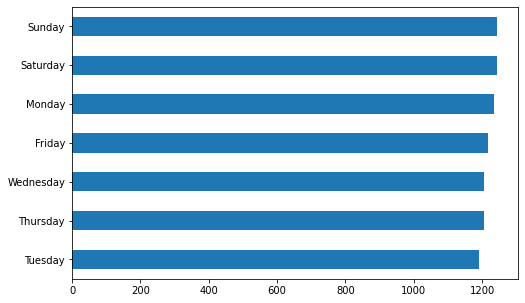


Precipitation


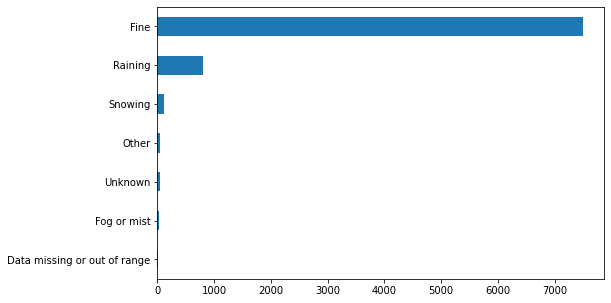


High_Winds


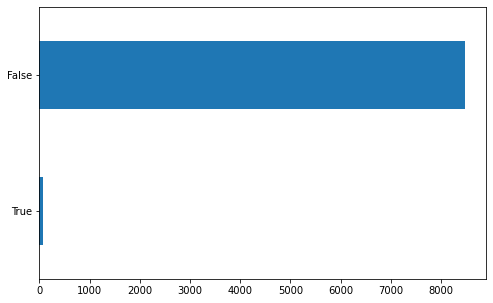


Road_Surface_Conditions


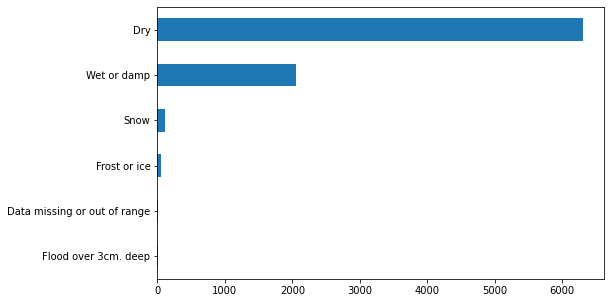


Light_Conditions


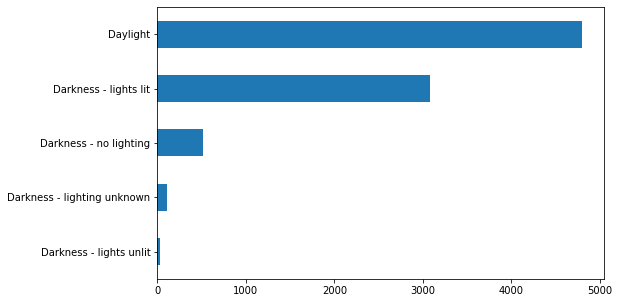


Urban_or_Rural_Area


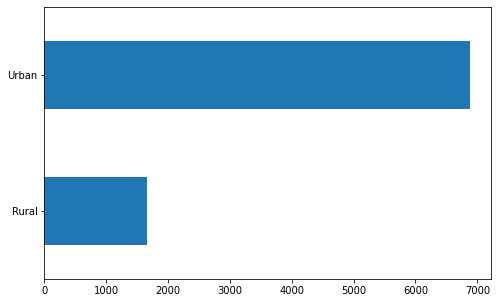


hour


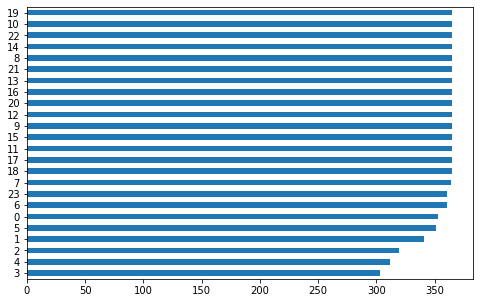


dayofweek


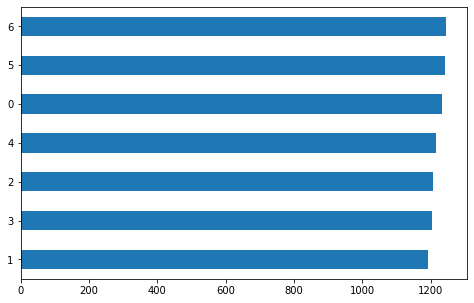


quarter


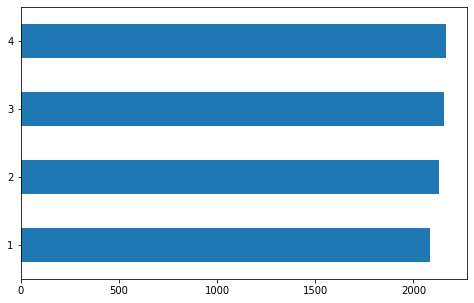


month


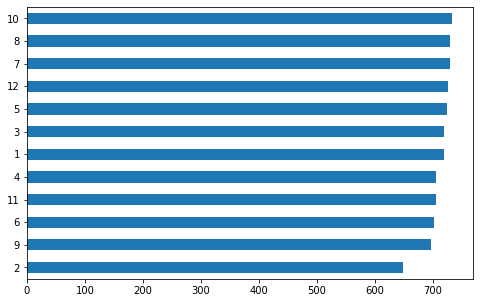


dayofyear


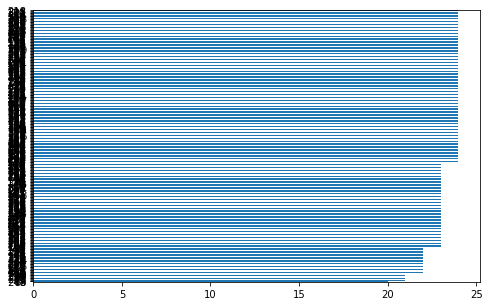


dayofmonth


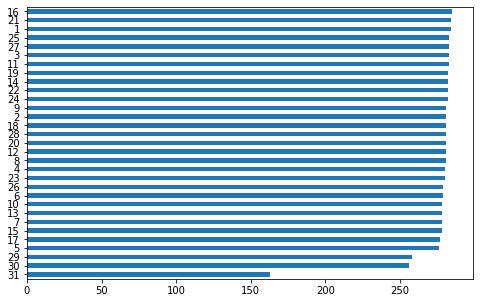


weekofyear


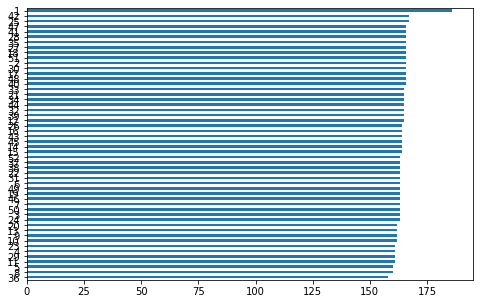

In [11]:
for i in df.columns[2:]:
    print(i)
    plt.figure(figsize=(8, 5))
    ax = df[i].value_counts().plot(kind="barh")
    ax.invert_yaxis()
    plt.show()
    print()

bank holidays
school rush
school breaks
storms
brz

In [12]:
df.pivot_table(index=(['Urban_or_Rural_Area','Day_of_Week'])
               , values='Count'
               , aggfunc=("count","sum")
              ).reset_index().sort_values('count', ascending=False)

,Urban_or_Rural_Area,Day_of_Week,count,sum
7,Urban,Friday,1014,18352
11,Urban,Thursday,1007,17274
9,Urban,Saturday,1005,14037
13,Urban,Wednesday,983,16780
12,Urban,Tuesday,972,16606
8,Urban,Monday,967,15677
10,Urban,Sunday,928,10730
3,Rural,Sunday,316,3068
1,Rural,Monday,267,2061
2,Rural,Saturday,238,2032


In [14]:
counter = 0
for column in df.columns:
    if len(df[df[column] == "Data missing or out of range"])+ len(df[df[column] == "Other"]) > 0:
        print(column)
        print(len(df[df[column] == "Data missing or out of range"]))
        counter += (len(df[df[column] == "Data missing or out of range"]))
        print(len(df[df[column] == "Other"]))
        counter += (len(df[df[column] == "Other"]))
        print()
        
print(f"Missing: {counter}")

Precipitation
1
51

Road_Surface_Conditions
11
0

Missing: 63


/Users/Edite/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
